# Filled Benchmark Figure on OpenML-CC18

## Setup

In [1]:
import ast
import numpy as np
import pandas as pd
import openml
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Define color palette
sns.set(
    color_codes=True, palette="bright", style="white", context="talk", font_scale=1.5
)

In [9]:
def plot_acc(col, ls, pos, n_train):
    if pos == 0:
        for i, l in enumerate(ls[pos]):
            col.plot(n_train, l, label=legends[i], c=colors[i], alpha=0.3)
    else:
        for i, l in enumerate(ls[pos]):
            col.plot(n_train, l, c=colors[i], alpha=0.3)


def plot_fill(col, rf_ls, sdf_ls, label, n_train):
    if label:
        col.fill_between(
            n_train,
            rf_ls,
            sdf_ls,
            where=sdf_ls <= rf_ls,
            color=colors[0],
            interpolate=True,
            alpha=0.3,
            label=legends[0],
        )
        col.fill_between(
            n_train,
            rf_ls,
            sdf_ls,
            where=sdf_ls >= rf_ls,
            color=colors[1],
            interpolate=True,
            alpha=0.3,
            label=legends[1],
        )
    else:
        col.fill_between(
            n_train,
            rf_ls,
            sdf_ls,
            where=sdf_ls <= rf_ls,
            color=colors[0],
            interpolate=True,
            alpha=0.3,
        )
        col.fill_between(
            n_train,
            rf_ls,
            sdf_ls,
            where=sdf_ls >= rf_ls,
            color=colors[1],
            interpolate=True,
            alpha=0.3,
        )

    return False


def plot_eff(col, ls, pos, n_train):
    if pos == 0:
        col.scatter(n_train, ls[pos], label=legends[1], c=colors[1], alpha=0.3, s=5)
    else:
        col.scatter(n_train, ls[pos], c=colors[1], alpha=0.3, s=5)

In [4]:
sns.set_theme(style="white", palette="bright", context="talk", font_scale=1.5)
BATCH_SIZE = 100
directory = "../benchmarks/results/"
prefixes = ["rf/", "sdf/"]
legends = [
    "RF wins",
    "SDF wins",
]
colors = ["b", "r"]
datasets = openml.study.get_suite("OpenML-CC18").data

In [5]:
ranges = []
rf_acc_dict = json.load(open(directory + "rf/cc18_acc.json"))
sdf_acc_dict = json.load(open(directory + "sdf/cc18_acc.json"))
avg_rf_acc_ls = []
avg_sdf_acc_ls = []

for dataset in datasets:
    ranges.append(len(rf_acc_dict[str(dataset)][0]))

    avg_rf_acc_l = np.mean(rf_acc_dict[str(dataset)], axis=0)
    avg_rf_acc_ls.append(avg_rf_acc_l)

    avg_sdf_acc_l = np.mean(sdf_acc_dict[str(dataset)], axis=0)
    avg_sdf_acc_ls.append(avg_sdf_acc_l)

avg_rf_acc_ls = np.array(avg_rf_acc_ls, dtype=object)
avg_sdf_acc_ls = np.array(avg_sdf_acc_ls, dtype=object)

## Plot accuracy comparison

In [26]:
ratio_ls = 100 * (avg_sdf_acc_ls - avg_rf_acc_ls) / avg_rf_acc_ls
eff_filters = []

eff_filter = []
for i in range(len(ratio_ls)):
    if np.amax(ratio_ls[i]) >= 1 and np.amin(ratio_ls[i]) <= -1:
        eff_filter.append(False)
    else:
        eff_filter.append(True)
# eff_filters.append(eff_filter)

# eff_filter = []
# for i in range(len(ratio_ls)):
#     if np.amax(ratio_ls[i]) <= 1 and np.amin(ratio_ls[i]) >= -1:
#         eff_filter.append(False)
#     else:
#         eff_filter.append(True)
# eff_filters.append(eff_filter)

# eff_filter = []
# for i in range(len(ratio_ls)):
#     if np.amin(ratio_ls[i]) > 0:
#         eff_filter.append(False)
#     else:
#         eff_filter.append(True)
# eff_filters.append(eff_filter)

# eff_filter = []
# for i in range(len(ratio_ls)):
#     if np.amax(ratio_ls[i]) < 0:
#         eff_filter.append(False)
#     else:
#         eff_filter.append(True)
# eff_filters.append(eff_filter)

In [30]:
72 - np.count_nonzero(eff_filter)

23

In [6]:
acc_ls = []
for prefix in prefixes:
    acc_l = []
    for dataset in datasets:
        f = open(directory + prefix + "cc18_acc.json")
        acc = np.mean(json.load(f)[str(dataset)], axis=0)[-1]
        f.close()
        acc_l.append(acc)
    acc_ls.append(acc_l)
acc_ls = np.array(acc_ls)

<AxesSubplot:xlabel='classifier', ylabel='Effect Size (%)'>

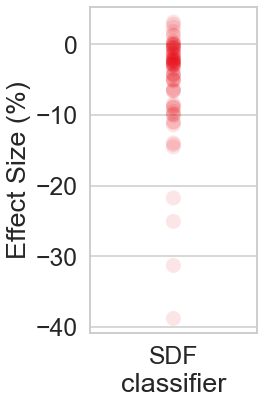

In [51]:
ratio_l = 100 * (acc_ls[1] - acc_ls[0]) / acc_ls[0]

ratio_df = pd.DataFrame(ratio_l, columns=["Effect Size (%)"])
ratio_df["classifier"] = "SDF"
# sns.boxplot(x="classifier", y="Difference Relative to RF", data=ratio_df,color="r")
plt.figure(figsize=(3, 6))
sns.stripplot(
    x="classifier",
    y="Effect Size (%)",
    data=ratio_df,
    size=15,
    color="r",
    jitter=0,
    alpha=0.1,
)

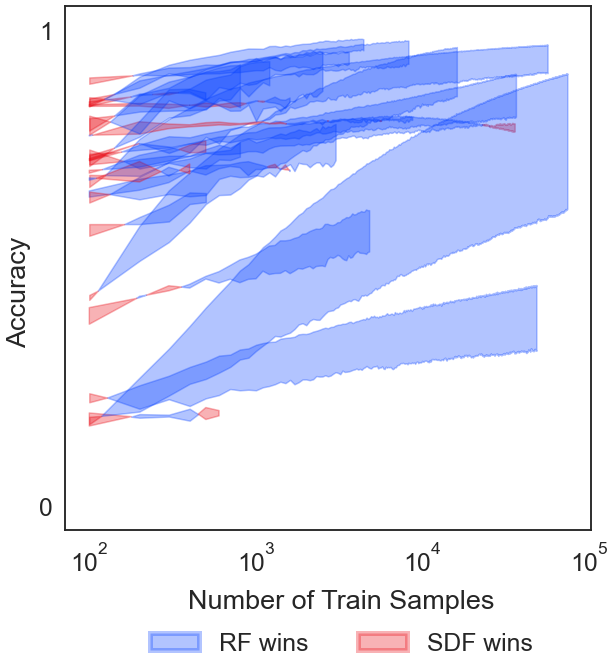

In [29]:
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
fig.text(-0.05, 0.5, "Accuracy", va="center", rotation="vertical")
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[-0.05, 1.05], [1e-4, 1e5]]
yticks = [[0, 1], [1e-4, 1e-1, 1e2, 1e5]]

label = True
for i in range(len(datasets)):
    n_train = range(100, (ranges[i] + 1) * 100, 100)

    if not eff_filter[i]:
        # Label x axis and plot figures
        label = plot_fill(ax, avg_rf_acc_ls[i], avg_sdf_acc_ls[i], label, n_train)

# Adjust x axis
ax.set_xscale("log")
#     ax.tick_params(
#         axis="x", which="both", bottom=False, top=False, labelbottom=False
#     )

# Adjust y axis
ax.set_ylim(ylimits[0])
ax.set_yticks(yticks[0])

# Adjust overall
#     ax.set_title(datasets[count])
leg = fig.legend(
    bbox_to_anchor=(0.53, -0.17),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/cc18_fill.pdf", transparent=True, bbox_inches="tight")

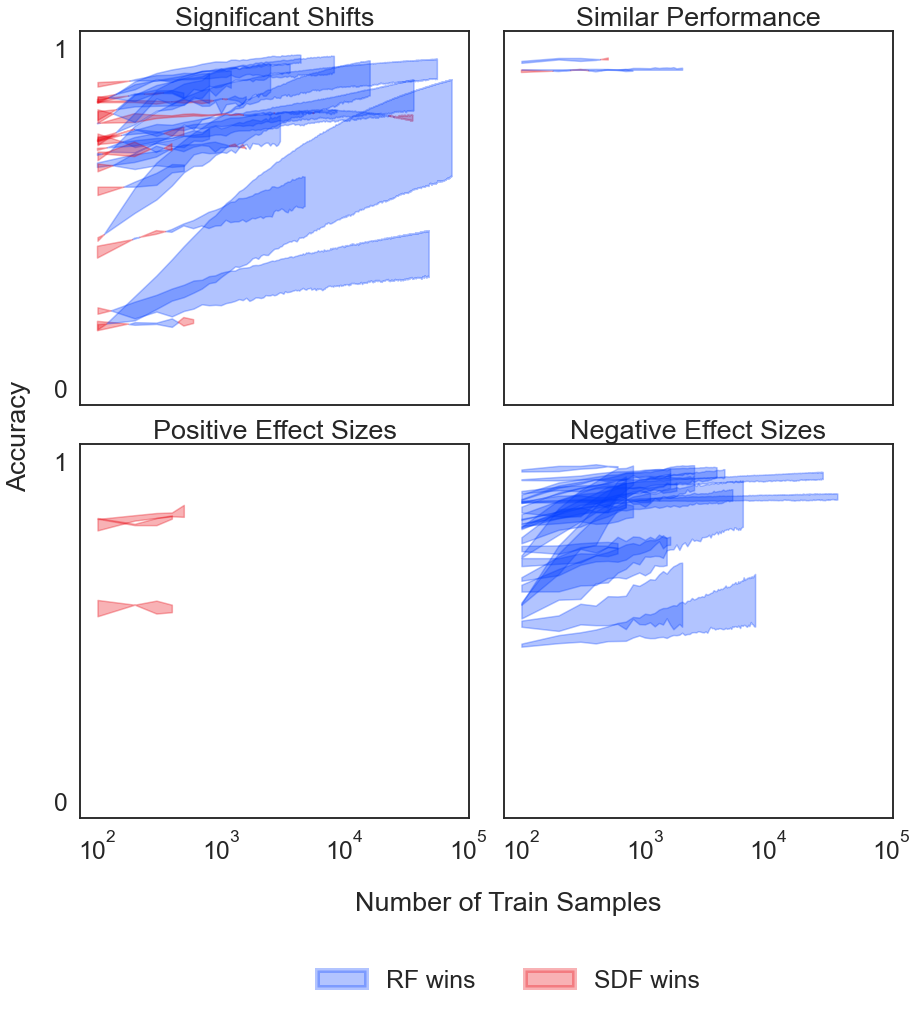

In [25]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(12, 12),
    constrained_layout=True,
    sharex=True,
)
fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
fig.text(-0.05, 0.5, "Accuracy", va="center", rotation="vertical")
titles = [
    "Significant Shifts",
    "Similar Performance",
    "Positive Effect Sizes",
    "Negative Effect Sizes",
]
ylimits = [[-0.05, 1.05], [1e-4, 1e5]]
yticks = [[0, 1], [1e-4, 1e-1, 1e2, 1e5]]

count = 0
label = True
for row in ax:
    for col in row:
        for i in range(len(datasets)):
            n_train = range(100, (ranges[i] + 1) * 100, 100)

            if not eff_filters[count][i]:
                # Label x axis and plot figures
                label = plot_fill(
                    col, avg_rf_acc_ls[i], avg_sdf_acc_ls[i], label, n_train
                )

        # Adjust x axis
        col.set_xscale("log")
        #     ax.tick_params(
        #         axis="x", which="both", bottom=False, top=False, labelbottom=False
        #     )
        if count < 2:
            col.set_xticks([])

        # Adjust y axis
        col.set_ylim(ylimits[0])
        if count == 1 or count == 3:
            col.set_yticks([])
        else:
            col.set_yticks(yticks[0])
        col.set_title(titles[count])
        count += 1

# Adjust overall
#     ax.set_title(datasets[count])
leg = fig.legend(
    bbox_to_anchor=(0.53, -0.17),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/cc18_fill.pdf", transparent=True, bbox_inches="tight")

## Plot all accuracy

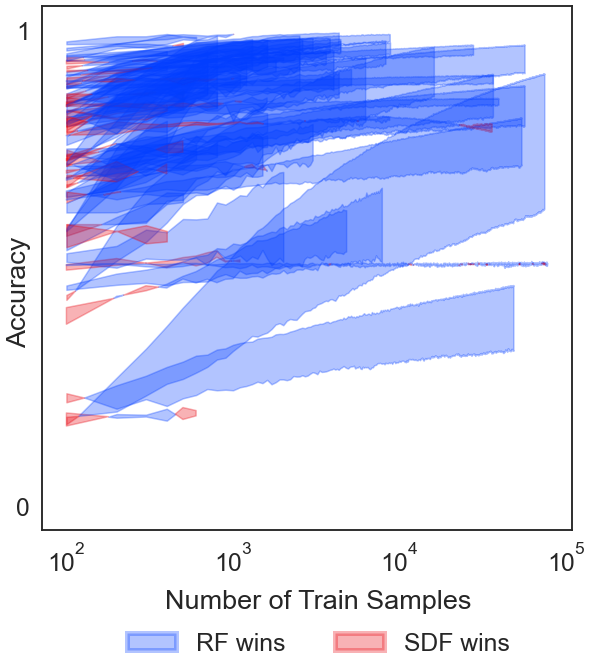

In [88]:
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
fig.text(-0.01, 0.5, "Accuracy", va="center", rotation="vertical")
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[-0.05, 1.05], [1e-4, 1e5]]
yticks = [[0, 1], [1e-4, 1e-1, 1e2, 1e5]]

for i in range(len(datasets)):
    n_train = range(100, (ranges[i] + 1) * 100, 100)

    if not eff_filter[i]:
        # Label x axis and plot figures
        plot_fill(ax, avg_rf_acc_ls[i], avg_sdf_acc_ls[i], i, n_train)

# Adjust x axis
ax.set_xscale("log")
#     ax.tick_params(
#         axis="x", which="both", bottom=False, top=False, labelbottom=False
#     )

# Adjust y axis
ax.set_ylim(ylimits[0])
ax.set_yticks(yticks[0])

# Adjust overall
#     ax.set_title(datasets[count])
leg = fig.legend(
    bbox_to_anchor=(0.53, -0.17),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/cc18_fill.pdf", transparent=True, bbox_inches="tight")

In [9]:
# Show concatenated time for batch estimators
concat = True

acc_ls = []
time_ls = []
ranges = []
for dataset in datasets:
    acc_l = []
    time_l = []

    for prefix in prefixes:
        f = open(directory + prefix + "cc18_acc.json")
        acc = np.mean(json.load(f)[str(dataset)], axis=0)
        f.close()
        acc_l.append(acc)

        f = open(directory + prefix + "cc18_train_t.json")
        time = np.mean(json.load(f)[str(dataset)], axis=0)
        f.close()

        if concat and prefix == "rf/":
            for j in range(1, len(time)):
                time[j] += time[j - 1]

        time_l.append(time)

    acc_ls.append(acc_l)
    time_ls.append(time_l)
    ranges.append(len(acc_l[0]))

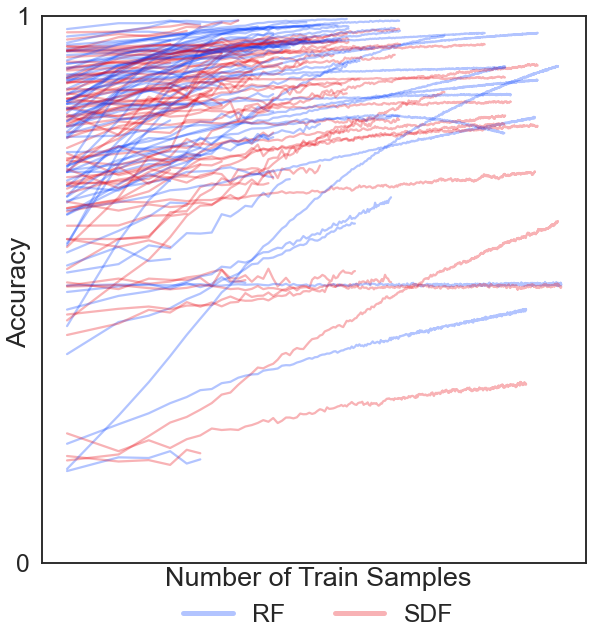

In [28]:
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
fig.text(0.53, -0.01, "Number of Train Samples", ha="center")
fig.text(-0.01, 0.5, "Accuracy", va="center", rotation="vertical")
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[-0.05, 1.05], [1e-4, 1e5]]
yticks = [[0, 1], [1e-4, 1e-1, 1e2, 1e5]]

for i in range(len(datasets)):
    n_train = range(100, (ranges[i] + 1) * 100, 100)

    # Label x axis and plot figures
    plot_acc(ax, acc_ls, i, n_train)

    # Adjust x axis
    ax.set_xscale("log")
    ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)

    # Adjust y axis
    ax.set_ylim(ylimits[0])
    ax.set_yticks(yticks[0])

    # Adjust overall
#     ax.set_title(datasets[count])
leg = fig.legend(
    bbox_to_anchor=(0.53, -0.12),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/cc18.pdf", transparent=True, bbox_inches="tight")

In [36]:
batch_counts = []
eff_size_ls = []
rf_acc_dict = json.load(open(directory + "rf/cc18_acc.json"))
sdf_acc_dict = json.load(open(directory + "sdf/cc18_acc.json"))
avg_rf_acc_ls = []
avg_sdf_acc_ls = []

for dataset in datasets:
    batch_count = len(rf_acc_dict[str(dataset)][0])
    batch_counts.append(batch_count)

    avg_rf_acc_l = np.mean(rf_acc_dict[str(dataset)], axis=0)
    avg_rf_acc_ls.append(avg_rf_acc_l)

    avg_sdf_acc_l = np.mean(sdf_acc_dict[str(dataset)], axis=0)
    avg_sdf_acc_ls.append(avg_sdf_acc_l)

for i in range(len(batch_counts)):
    eff_size_l = []
    for j in range(batch_counts[i]):
        rf_acc = avg_rf_acc_ls[i][j]
        sdf_acc = avg_sdf_acc_ls[i][j]
        eff_size_l.append(100 * (sdf_acc - rf_acc) / rf_acc)
    eff_size_ls.append(eff_size_l)

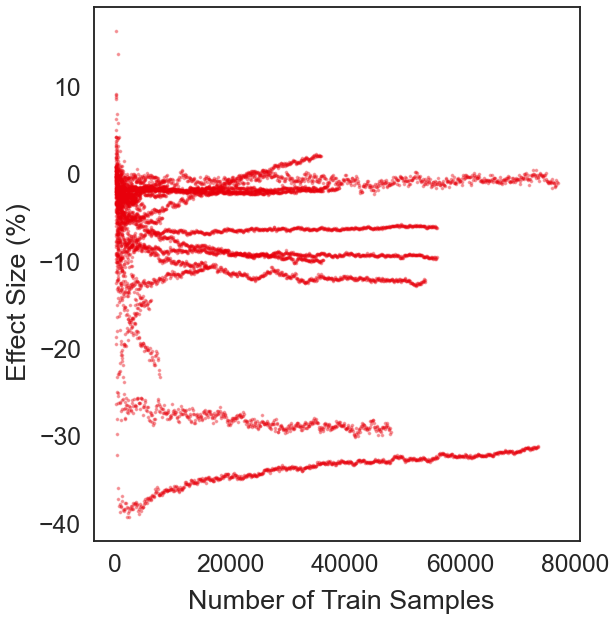

In [53]:
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
fig.text(-0.05, 0.5, "Effect Size (%)", va="center", rotation="vertical")
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[-0.05, 1.05], [1e-4, 1e5]]
yticks = [[0, 1], [1e-4, 1e-1, 1e2, 1e5]]

for i in range(len(datasets)):
    n_train = range(100, (ranges[i] + 1) * 100, 100)

    # Label x axis and plot figures
    plot_eff(ax, eff_size_ls, i, n_train)

    # Adjust x axis
#     ax.set_xscale("log")
#     ax.tick_params(
#         axis="x", which="both", bottom=False, top=False, labelbottom=False
#     )

# Adjust y axis
#     ax.set_ylim(ylimits[0])
#     ax.set_yticks(yticks[0])

# Adjust overall
#     ax.set_title(datasets[count])
# leg = fig.legend(
#     bbox_to_anchor=(0.53, -0.16),
#     bbox_transform=plt.gcf().transFigure,
#     ncol=3,
#     loc="lower center",
# )
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)